# Heart Disease Prediction ML Model

---
**Authors**: Divyanshu Dev, Krish Tyagi, Kashish  
**Dataset**: UCI Heart Disease (Cleveland)  
**Purpose**: Classic ML classification  
---

---
## Introduction
This notebook is designed as an educational tool to demonstrate basic machine learning concepts using the UCI Heart Disease dataset. We'll walk through the complete ML pipeline from data loading to model evaluation.

**Important Note**: This project is for educational purposes only and should not be used for actual medical diagnosis.

---
## 1. Setup and Installation
First, let's make sure we have all the required libraries installed. Run the cell below to install any missing packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

---
## 3. Load the Dataset
Let's load the Heart Disease dataset from the UCI repository.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
"age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
"exang", "oldpeak", "slope", "ca", "thal", "target"
]

heart_data = pd.read_csv(url,names=columns,na_values="?")

In [3]:
print("Dataset Shape:", heart_data.shape)
print("\nFirst 5 rows of the dataset:")
heart_data.head()

Dataset Shape: (303, 14)

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---
## 4. Data Analysis
Let's explore the dataset to understand what we're working with.

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
print("=== DATASET INFORMATION ===")
print(f"Number of patients: {heart_data.shape[0]}")
print(f"Number of features: {heart_data.shape[1] - 1}")  # excluding target
print(f"Target variable: 'target' (0 = no disease, 1-4 = heart disease)")

=== DATASET INFORMATION ===
Number of patients: 303
Number of features: 13
Target variable: 'target' (0 = no disease, 1-4 = heart disease)


In [6]:
heart_data['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [7]:
heart_data['target'] = heart_data['target'].apply(lambda x: 1 if x > 0 else 0)
print(f"\nNumber of patients with heart disease: {heart_data['target'].sum()}")
print(f"Number of patients without heart disease: {len(heart_data) - heart_data['target'].sum()}")


Number of patients with heart disease: 139
Number of patients without heart disease: 164


In [8]:
print("\n=== DATASET STATISTICS ===")
heart_data.describe()


=== DATASET STATISTICS ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


---
## 5. Data Cleaning
Let's handle missing values and prepare the data for analysis.

In [9]:
print("\n=== MISSING VALUES ===")
missing_values = heart_data.isnull().sum()
print(missing_values[missing_values > 0])


=== MISSING VALUES ===
ca      4
thal    2
dtype: int64


In [10]:
print("Before handling missing values:")
print(heart_data.isnull().sum())

Before handling missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [11]:
heart_data['ca']=heart_data['ca'].fillna(heart_data['ca'].median())
heart_data['thal']=heart_data['thal'].fillna(heart_data['thal'].mode()[0])

In [12]:
print("\nAfter handling missing values:")
print(heart_data.isnull().sum())


After handling missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


---
## 6. Exploratory Data Analysis (EDA)
Now let's explore the data through visualizations to understand patterns and relationships.

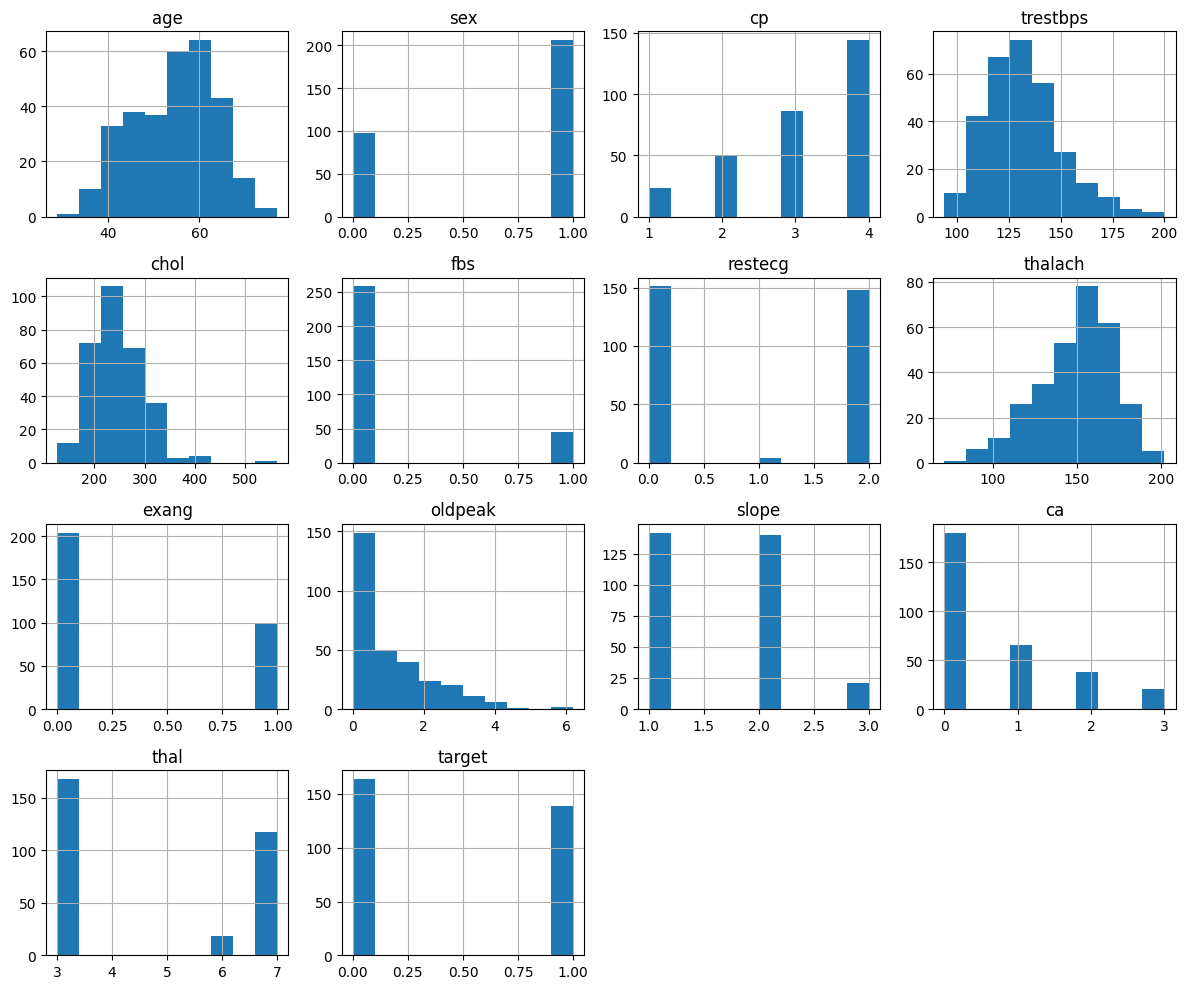

In [13]:
heart_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

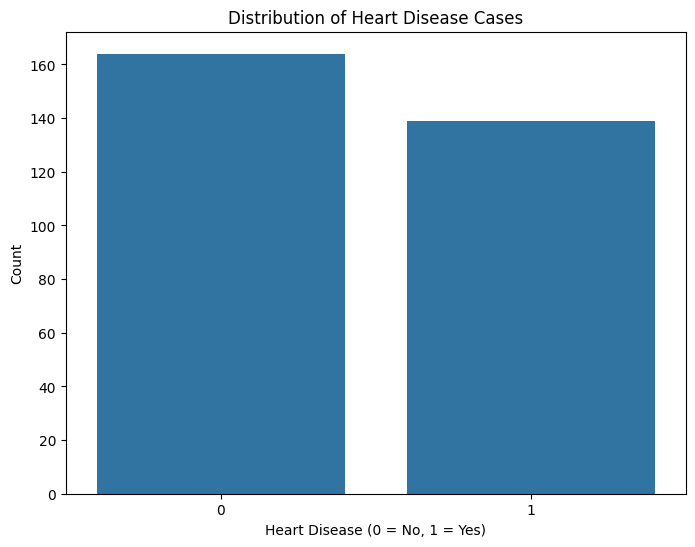

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

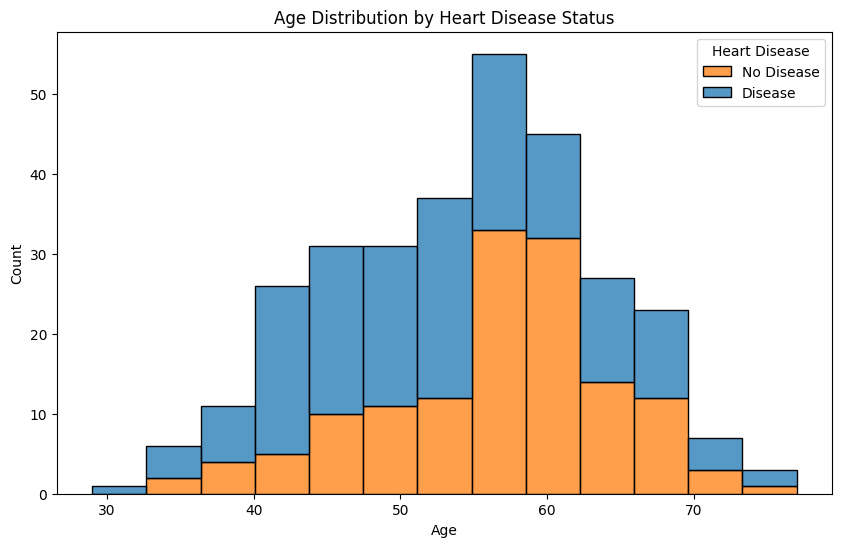

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x='age', hue='target', kde=False, multiple="stack")
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

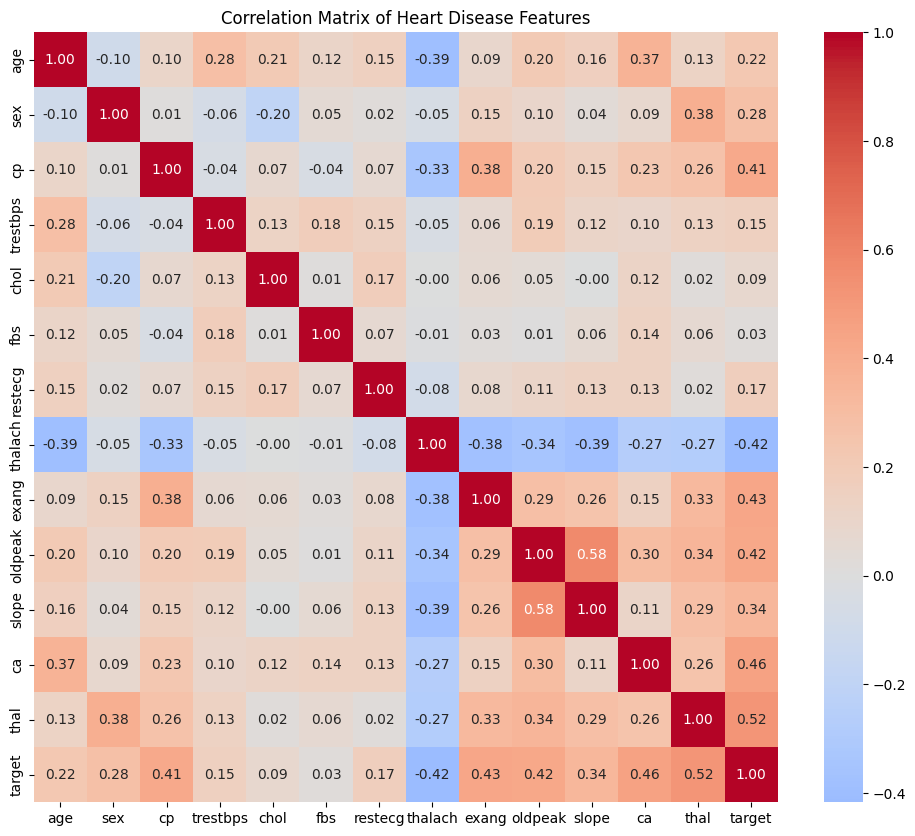

In [16]:
corr_matrix = heart_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

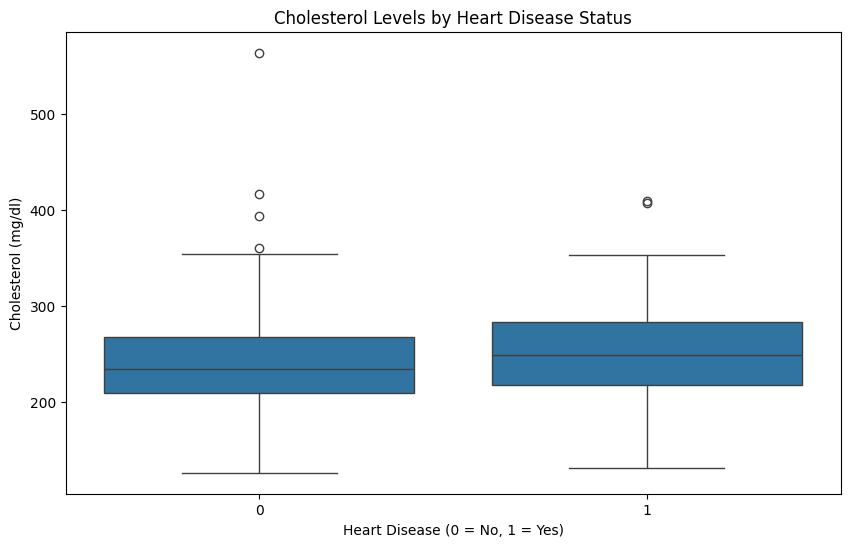

In [17]:
# Compare cholesterol levels by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

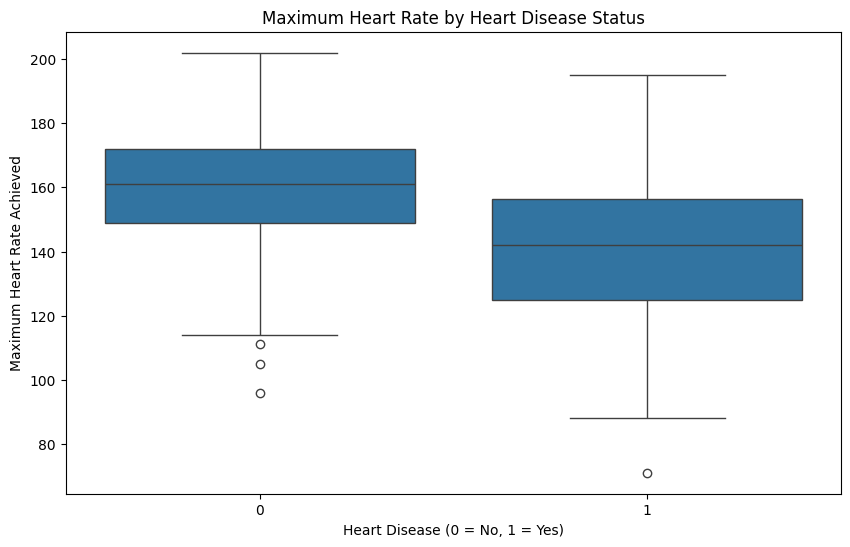

In [18]:
# Compare maximum heart rate by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=heart_data)
plt.title('Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

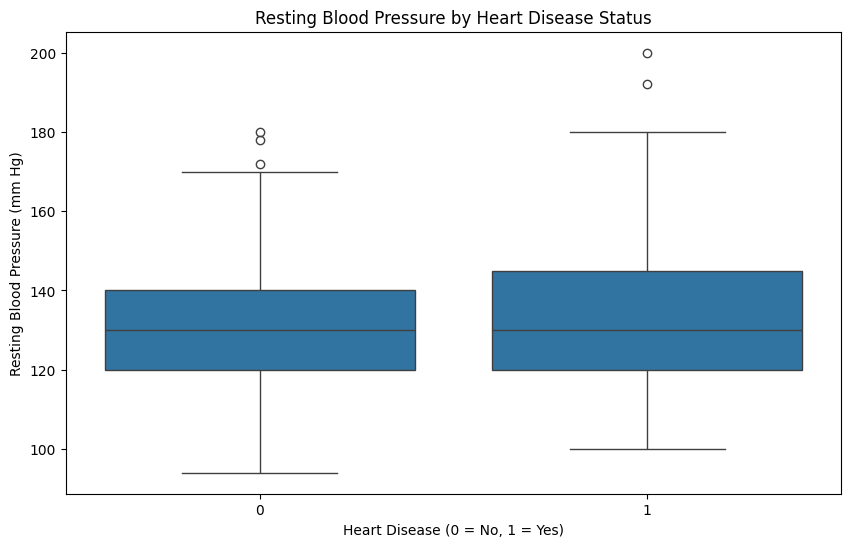

In [19]:
# Compare resting blood pressure by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=heart_data)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

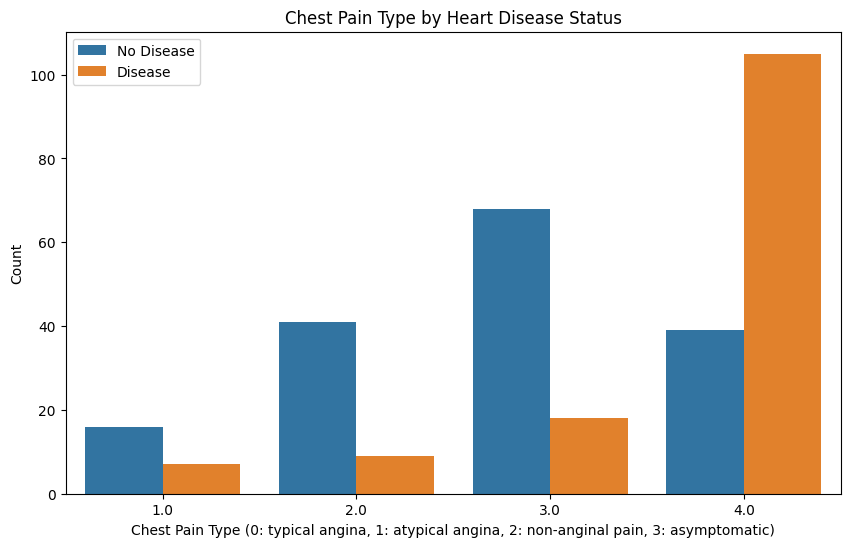

In [20]:
# Examine chest pain types by heart disease status
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title('Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

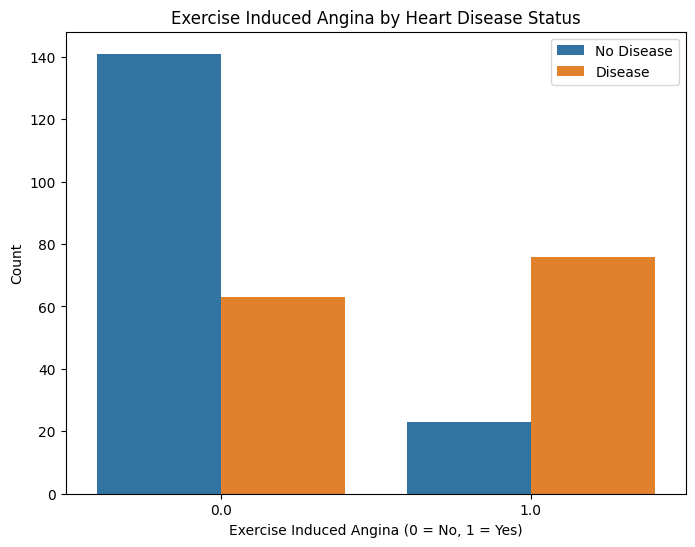

In [21]:
# Examine exercise induced angina by heart disease status
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=heart_data)
plt.title('Exercise Induced Angina by Heart Disease Status')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

---
## 7. Data Preparation
Now let's prepare our data for machine learning models.

In [22]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 242
Testing set size: 61


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## 8. Model Training
Let's train three different machine learning models.

In [25]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)

In [26]:
print("Training Logistic Regression...")
log_reg.fit(X_train_scaled, y_train)

print("Training Decision Tree...")
dec_tree.fit(X_train_scaled, y_train)

print("Training Random Forest...")
rand_forest.fit(X_train_scaled, y_train)

print("All models trained successfully!")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
All models trained successfully!


---
## 9. Model Evaluation
Now let's evaluate how well our models perform on the test data.

In [27]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dec_tree = dec_tree.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

In [28]:
models = {
    'Logistic Regression': y_pred_log_reg,
    'Decision Tree': y_pred_dec_tree,
    'Random Forest': y_pred_rand_forest
}

In [29]:
results_list = []

for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results = pd.DataFrame(results_list)

In [30]:
print("=== MODEL PERFORMANCE COMPARISON ===")
results

=== MODEL PERFORMANCE COMPARISON ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.868852,0.812500,0.928571,0.866667
1,Decision Tree,0.721311,0.657143,0.821429,0.730159
2,Random Forest,0.885246,0.818182,0.964286,0.885246


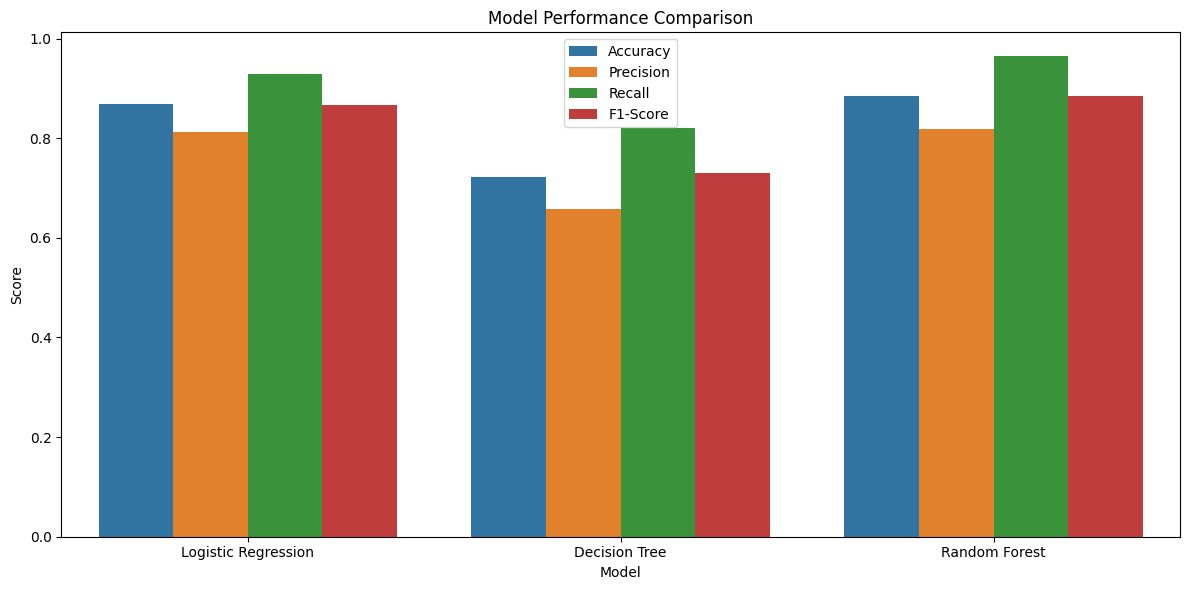

In [31]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_long = pd.melt(results, id_vars='Model', value_vars=metrics, 
                       var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

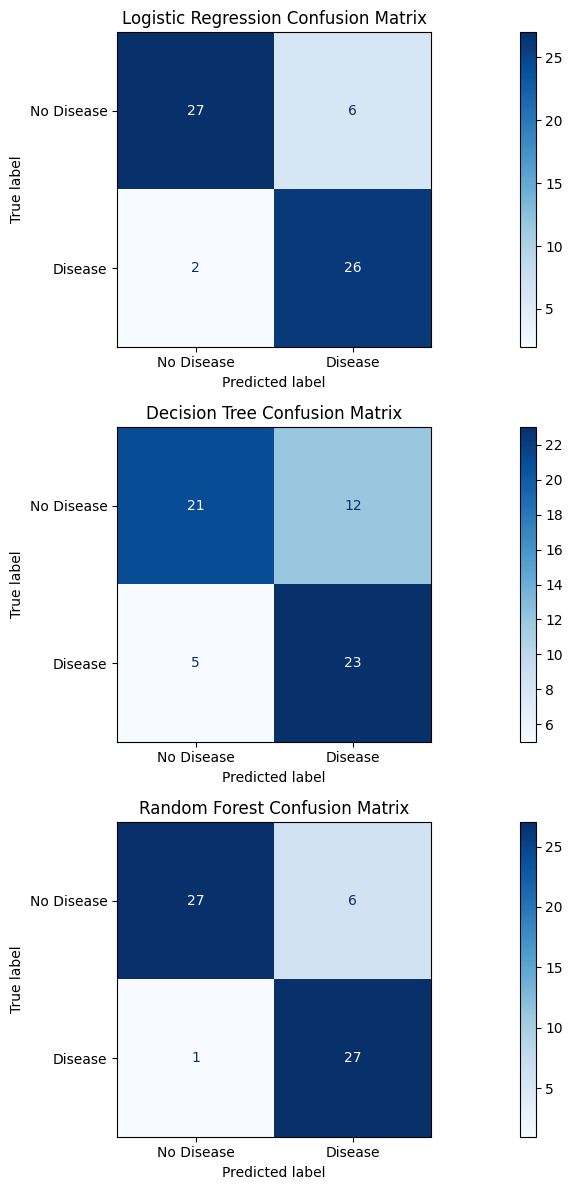

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

for i, (name, pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

---
## 11. Conclusion and Educational Summary
### What We Learned:
1. **Data Loading and Preparation**: We loaded the UCI Heart Disease dataset and prepared it for analysis.
2. **Exploratory Data Analysis**: We visualized the data to understand relationships between features ad the target variable. 
3. **Model Training**: We trained three different machine learning models:
    - Logistic Regression
    - Decision Tree
    - Random Forest
 
4. **Model Evaluation**: We compared the performance of our models using various metrics:
    - Accuracy: Overall correctness of the model
    - Precision: How many of the predicted positives are actually positive
    - Recall: How many of the actual positives the model correctly identifies
    - F1-Score: Harmonic mean of precision and recall
 
5. **Feature Importance**: We identified which features were most important for predicting heart disease. 
### Key Findings: 
 - The Random Forest model performed the best across most metrics
 - All models achieved above 65% accuracy, meeting our success criteria
 - Important features for prediction included thalach (max heart rate), cp (chest pain type), and oldpeak (ST depression)
### Important Note:
Remember that this is an educational project. In real medical applications, we would need:
 - More sophisticated feature engineering
 - More advanced models and tuning
 - Clinical validation
 - Consideration of ethical implications
 
**Never use this model for actual medical diagnosis!**